## K Mean Clustering

In [1]:
import pandas as pd

In [90]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

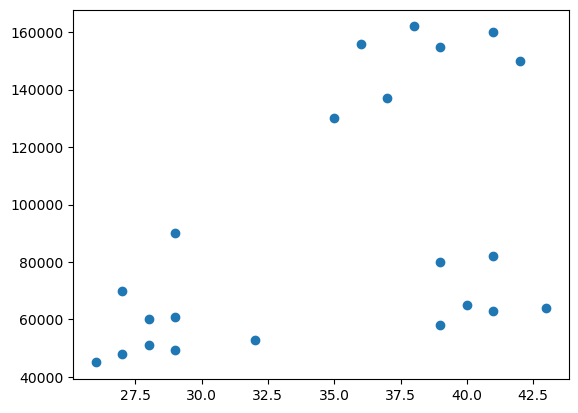

In [92]:
plt.scatter(df.Age, df['Income($)'])

In [93]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

In [94]:
y = km.fit_predict(df[['Age','Income($)']])
y

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [95]:
df['cluster'] = y
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [96]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [97]:
df1

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


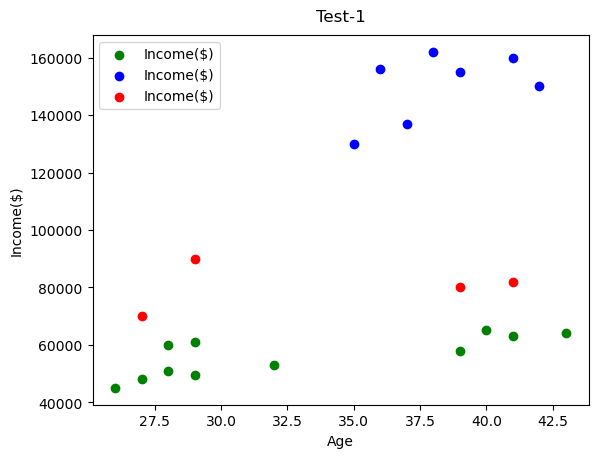

In [98]:
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label='Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', label='Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'red', label='Income($)')
plt.title("Test-1", pad = 10)
plt.xlabel("Age", color = 'black')
plt.ylabel("Income($)", color = 'black')
plt.legend()

## This is not much accurate

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [30]:
mms.fit(df[['Income($)']])
df['Income($)'] = mms.transform(df[['Income($)']])
mms.fit(df[['Age']])
df['Age'] = mms.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [33]:
df1 = df.drop('cluster', axis = 'columns')
df1.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [34]:
y1 = km.fit_predict(df1[['Age','Income($)']])
y1

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [37]:
df1['Cluster'] = y1
df1.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [38]:
df11 = df1[df1.Cluster == 0]
df12 = df1[df1.Cluster == 1]
df13 = df1[df1.Cluster == 2]

In [41]:
df13

,Name,Age,Income($),Cluster
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2
10,Donald,0.647059,0.786325,2


### centroid

In [50]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

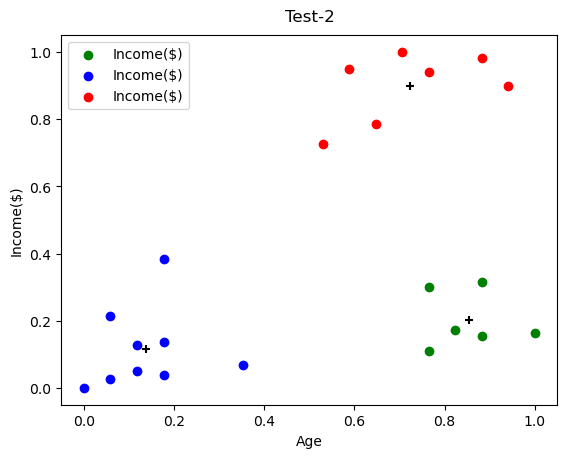

In [53]:
plt.scatter(df11.Age, df11['Income($)'], color = 'green', label='Income($)')
plt.scatter(df12.Age, df12['Income($)'], color = 'blue', label='Income($)')
plt.scatter(df13.Age, df13['Income($)'], color = 'red', label='Income($)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '+')
plt.title("Test-2", pad = 10)
plt.xlabel("Age", color = 'black')
plt.ylabel("Income($)", color = 'black')
plt.legend()

## Elbow Technique

In [61]:
k_range = range(1,10)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [62]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26217927623452136,
 0.2155256331475538,
 0.1685851223602976,
 0.1327661931978319,
 0.10663983840905436]

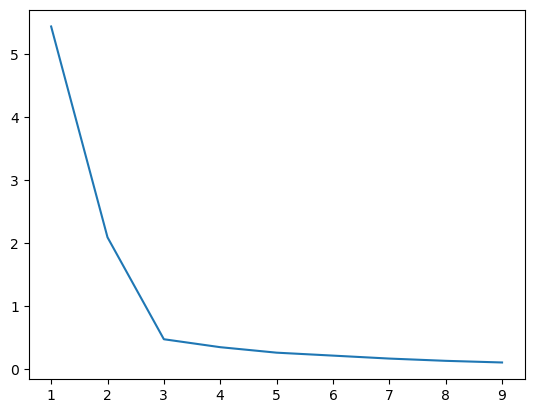

In [63]:
plt.plot(k_range,sse)

## Exercise
IRIS dataset

In [72]:
from sklearn.datasets import load_iris
r = load_iris()

In [73]:
dir(r)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
hr = pd.DataFrame(r.data, columns = r.feature_names)
hr.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
hr.drop(['petal length (cm)','petal width (cm)'], axis = 'columns', inplace = True)
hr.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


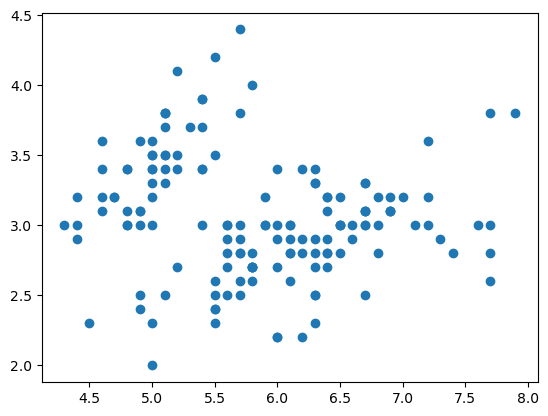

In [76]:
plt.scatter(hr['sepal length (cm)'], hr['sepal width (cm)'])

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [82]:
k = KMeans(n_clusters=3)

In [83]:
predicted = k.fit_predict(hr)
predicted

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [86]:
hr['Cluster'] = predicted
hr.head()

,sepal length (cm),sepal width (cm),Cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [87]:
hr0 = hr[hr.Cluster == 0]
hr1 = hr[hr.Cluster == 1]
hr2 = hr[hr.Cluster == 2]

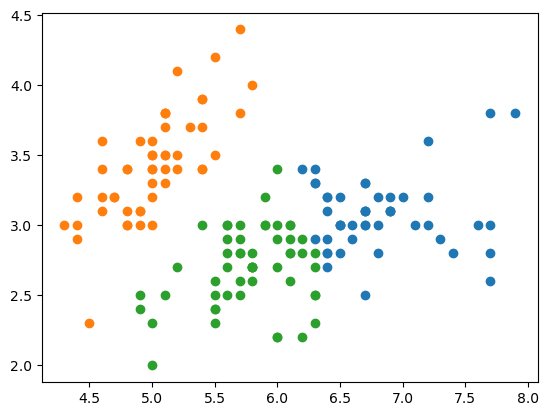

In [89]:
plt.scatter(hr0['sepal length (cm)'], hr0['sepal width (cm)'])
plt.scatter(hr1['sepal length (cm)'], hr1['sepal width (cm)'])
plt.scatter(hr2['sepal length (cm)'], hr2['sepal width (cm)'])

In [99]:
m = MinMaxScaler()

In [109]:
m.fit(hr[['sepal length (cm)']])
hr['sepal length (cm)'] = m.transform(hr[['sepal length (cm)']])
m.fit(hr[['sepal width (cm)']])
hr['sepal width (cm)'] = m.transform(hr[['sepal width (cm)']])
hr.head()

,sepal length (cm),sepal width (cm),Cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [110]:
hr.drop('Cluster', axis = 'columns', inplace = True)
hr

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
...,...,...
145,0.666667,0.416667
146,0.555556,0.208333
147,0.611111,0.416667
148,0.527778,0.583333


In [111]:
new_p = k.fit_predict(hr)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [112]:
hr['New_cluster'] = new_p

In [113]:
hr

,sepal length (cm),sepal width (cm),New_cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,2
147,0.611111,0.416667,0
148,0.527778,0.583333,0


In [115]:
hr00 = hr[hr.New_cluster == 0]
hr01 = hr[hr.New_cluster == 1]
hr02 = hr[hr.New_cluster == 2]

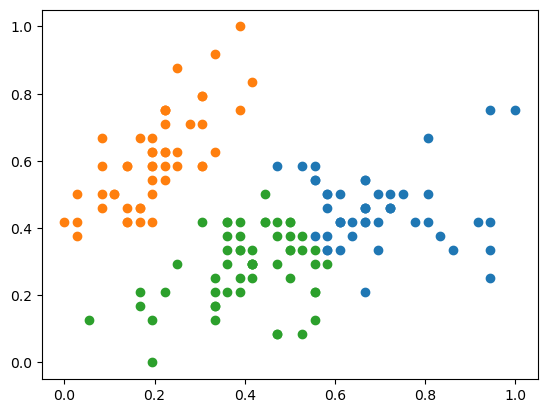

In [116]:
plt.scatter(hr00['sepal length (cm)'], hr00['sepal width (cm)'])
plt.scatter(hr01['sepal length (cm)'], hr01['sepal width (cm)'])
plt.scatter(hr02['sepal length (cm)'], hr02['sepal width (cm)'])

## We can see that no chnage

In [117]:
k.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.19897959, 0.60459184],
       [0.40483539, 0.28009259]])

Text(0.5, 1.0, 'Himel')

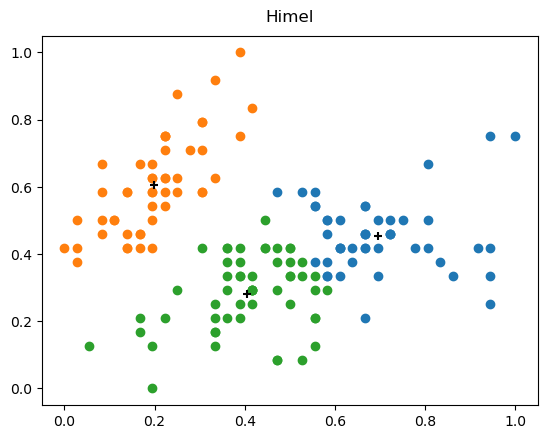

In [118]:
plt.scatter(hr00['sepal length (cm)'], hr00['sepal width (cm)'])
plt.scatter(hr01['sepal length (cm)'], hr01['sepal width (cm)'])
plt.scatter(hr02['sepal length (cm)'], hr02['sepal width (cm)'])
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color = "black", marker = "+")
plt.title("Himel", pad = 10)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

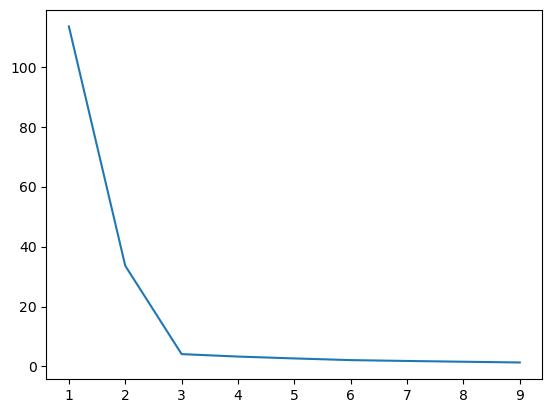

In [119]:
sse1 = []
h_range = range(1,10)

for x in h_range:
    k = KMeans(n_clusters = x)
    k.fit(hr)
    sse1.append(k.inertia_)
    
plt.plot(h_range, sse1)